In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Dữ liệu Train

In [4]:
dfn = pd.read_csv("/content/sample_data/train.csv")

#Tách thành hai tập dữ liệu là Object và Number

In [5]:
train_obj_cols = dfn.select_dtypes(include=['object', 'string'])
train_num_cols = dfn.select_dtypes(include=['number'])

In [6]:
print(train_obj_cols.dtypes.to_string())

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [7]:
print(train_num_cols.dtypes.to_string())

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64


#Xử lý các giá trị 0 hoặc NA của các cột kiểu số

In [8]:
# Tạo mask các ô có giá trị bằng 0 hoặc NA (NaN, pd.NA)
train_na_num_cols = (train_num_cols == 0) | (train_num_cols.isna())
# Tính phần trăm mỗi cột
train_percent_num = train_na_num_cols.sum() / len(train_num_cols) * 100

In [9]:
print(train_percent_num)

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea       59.520548
BsmtFinSF1       31.986301
BsmtFinSF2       88.561644
BsmtUnfSF         8.082192
TotalBsmtSF       2.534247
1stFlrSF          0.000000
2ndFlrSF         56.780822
LowQualFinSF     98.219178
GrLivArea         0.000000
BsmtFullBath     58.630137
BsmtHalfBath     94.383562
FullBath          0.616438
HalfBath         62.534247
BedroomAbvGr      0.410959
KitchenAbvGr      0.068493
TotRmsAbvGrd      0.000000
Fireplaces       47.260274
GarageYrBlt       5.547945
GarageCars        5.547945
GarageArea        5.547945
WoodDeckSF       52.123288
OpenPorchSF      44.931507
EnclosedPorch    85.753425
3SsnPorch        98.356164
ScreenPorch      92.054795
PoolArea         99.520548
MiscVal          96.438356
MoSold            0.000000
YrSold            0.000000
S

In [10]:
# Missing value treatments
# Lọc các cột có tỷ lệ > 2%
train_num_to_drop = train_percent_num[train_percent_num > 2].index
# Xoá các cột đó
dfn.drop(columns= train_num_to_drop, inplace=True)
dfn.drop(columns= "Id", inplace= True)

In [11]:
print(((dfn.isnull().sum() / len(dfn)) * 100).to_string())

MSSubClass        0.000000
MSZoning          0.000000
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
1stFlrSF          0.000000
G

In [12]:
train_na_obj_cols = train_obj_cols.isna()
train_percent_obj = train_na_obj_cols.sum() / len(train_obj_cols) * 100

#Xử lý các giá trị NA của các cột kiểu object, string,...

In [13]:
print(train_percent_obj)

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [14]:
# Lọc các cột có tỷ lệ > 2%
train_obj_to_drop = train_percent_obj[train_percent_obj > 2].index
# Xoá các cột đó
dfn.drop(columns= train_obj_to_drop, inplace=True)

In [15]:
print(((dfn.isnull().sum() / len(dfn)) * 100).to_string())

MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
1stFlrSF         0.000000
GrLivArea        0.000000
FullBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
PavedDrive       0.000000
MoSold      

#Xử lý dữ liệu trùng lặp


In [16]:
dfn = dfn.drop_duplicates()

#Xử lý ngoại lệ

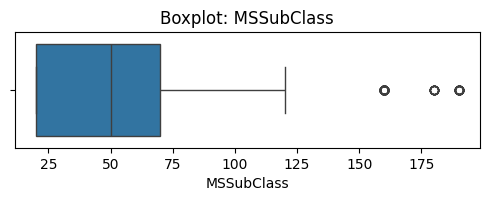

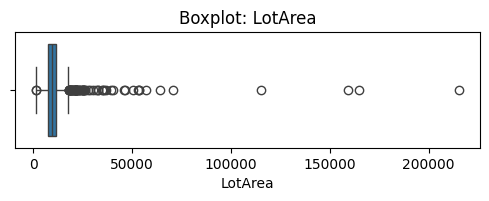

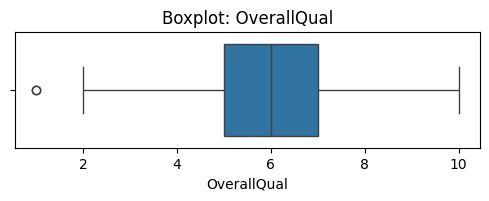

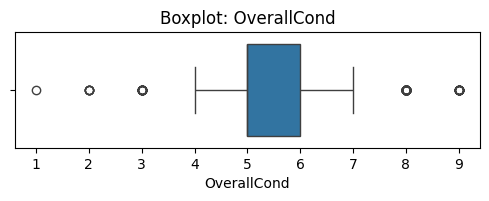

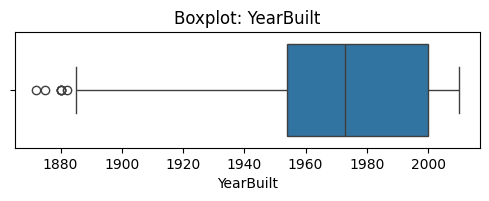

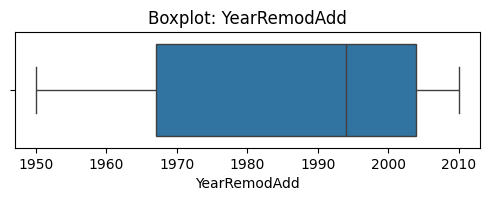

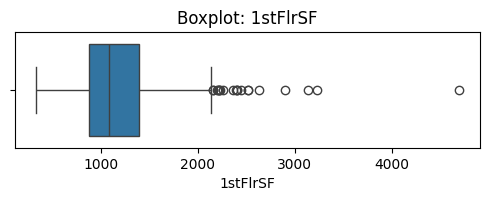

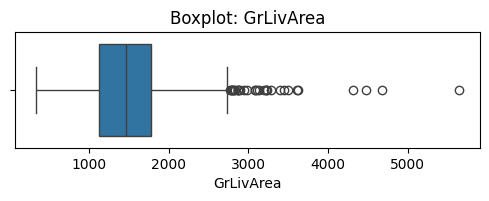

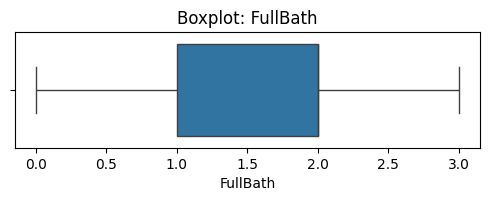

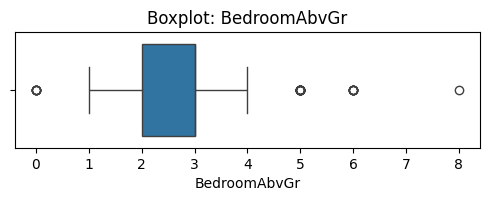

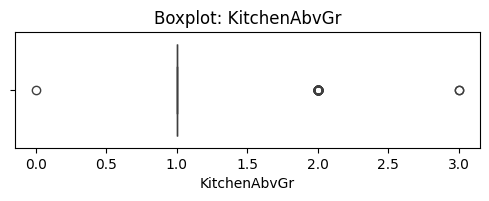

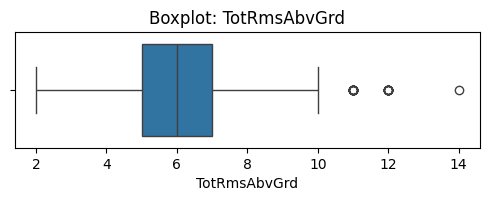

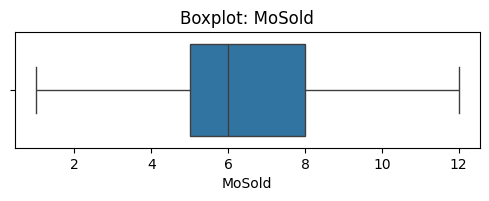

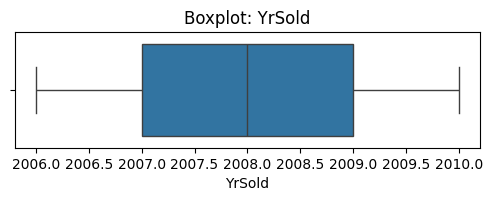

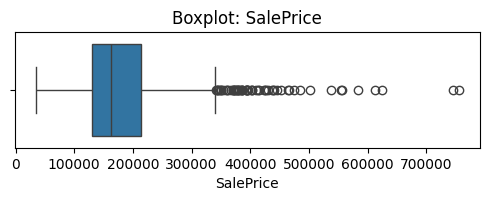

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

train_numeric_cols = dfn.select_dtypes(include=['number']).columns.tolist()
for col in train_numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=dfn[col])
    plt.title(f'Boxplot: {col}')
    plt.show()
#Các chấm xa hộp là outlier

In [18]:
print(len(train_numeric_cols))

15


In [19]:
train_remove_cols = ["YearRemodAdd", "FullBath", "MoSold", "YrSold"]
train_cols_list = [col for col in train_numeric_cols if col not in train_remove_cols]

In [20]:
#Dữ liệu nằm ngoài khoảng [lower_bound, upper_bound] được xem là outlier
#Q1: tứ phân vị thứ nhất - 25% các giá trị trong bộ dữ liệu nhỏ hơn hoặc bằng Q1
#Q3: tứ phân vị thứ ba - 75% các giá trị trong bộ dữ liệu nhỏ hơn hoặc bằng Q3
#IQR: mức độ phân tán của dữ liệu giữa Q1 và Q3
def whisker(col):
    q1, q3 = np.percentile(col.dropna(), [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [21]:
#clipping of threshold values
for col in train_cols_list:
    #Tính ngưỡng dưới và ngưỡng trên
    lw, uw = whisker(dfn[col])

    #Nếu giá trị nhỏ hơn lw, thay bằng lw
    dfn[col] = np.where(dfn[col] < lw, lw, dfn[col])

    #Nếu giá trị lớn hơn uw, thay bằng uw
    dfn[col] = np.where(dfn[col] > uw, uw, dfn[col])

In [22]:
print(len(dfn.columns))

43


#Dữ liệu Test

In [23]:
dft = pd.read_csv("/content/sample_data/test.csv")

In [24]:
test_obj_cols = dft.select_dtypes(include=['object', 'string'])
test_num_cols = dft.select_dtypes(include=['number'])

In [25]:
print(test_obj_cols.dtypes.to_string())

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [26]:
print(test_num_cols.dtypes.to_string())

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64


#Xử lý các giá trị 0 hoặc NA của các cột kiểu số

In [27]:
# Tạo mask các ô có giá trị bằng 0 hoặc NA (NaN, pd.NA)
test_na_num_cols = (test_num_cols == 0) | (test_num_cols.isna())
# Tính phần trăm mỗi cột
test_percent_num = test_na_num_cols.sum() / len(test_num_cols) * 100

In [28]:
# Missing value treatments
# Lọc các cột có tỷ lệ > 2%
test_num_to_drop = test_percent_num[test_percent_num > 2].index
# Xoá các cột đó
dft.drop(columns= test_num_to_drop, inplace=True)
dft.drop(columns= "Id", inplace= True)

In [29]:
test_na_obj_cols = test_obj_cols.isna()
test_percent_obj = test_na_obj_cols.sum() / len(test_obj_cols) * 100

#Xử lý các giá trị NA của các cột kiểu object, string,...

In [30]:
# Lọc các cột có tỷ lệ > 2%
test_obj_to_drop = test_percent_obj[test_percent_obj > 2].index
# Xoá các cột đó
dft.drop(columns= test_obj_to_drop, inplace=True)

In [31]:
print(((dft.isnull().sum() / len(dft)) * 100).to_string())

MSSubClass       0.00000
MSZoning         0.27416
LotArea          0.00000
Street           0.00000
LotShape         0.00000
LandContour      0.00000
Utilities        0.13708
LotConfig        0.00000
LandSlope        0.00000
Neighborhood     0.00000
Condition1       0.00000
Condition2       0.00000
BldgType         0.00000
HouseStyle       0.00000
OverallQual      0.00000
OverallCond      0.00000
YearBuilt        0.00000
YearRemodAdd     0.00000
RoofStyle        0.00000
RoofMatl         0.00000
Exterior1st      0.06854
Exterior2nd      0.06854
ExterQual        0.00000
ExterCond        0.00000
Foundation       0.00000
Heating          0.00000
HeatingQC        0.00000
CentralAir       0.00000
Electrical       0.00000
1stFlrSF         0.00000
GrLivArea        0.00000
FullBath         0.00000
BedroomAbvGr     0.00000
KitchenAbvGr     0.00000
KitchenQual      0.06854
TotRmsAbvGrd     0.00000
Functional       0.13708
PavedDrive       0.00000
MoSold           0.00000
YrSold           0.00000


#Xử lý dữ liệu trùng lặp

In [32]:
dft = dft.drop_duplicates()

#Xử lý ngoại lệ

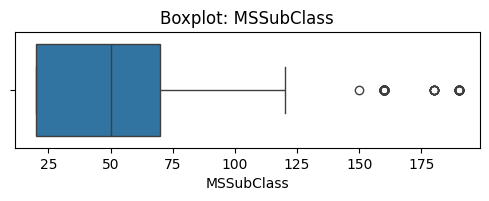

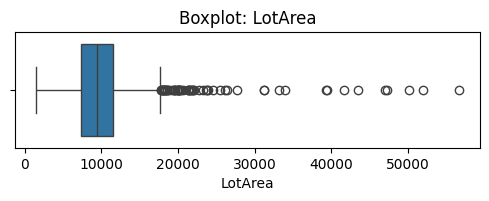

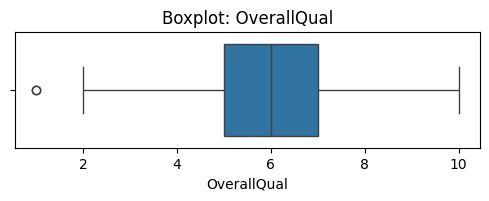

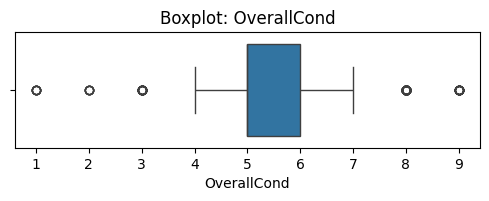

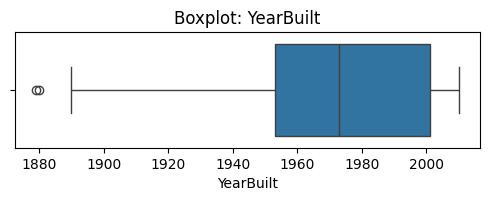

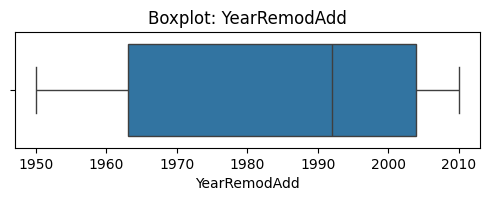

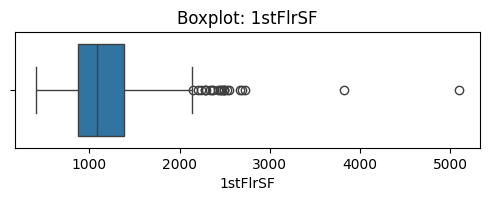

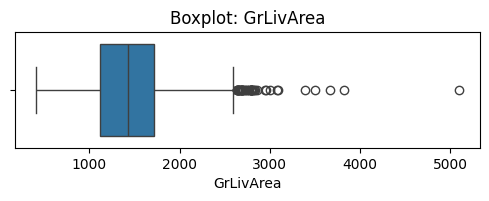

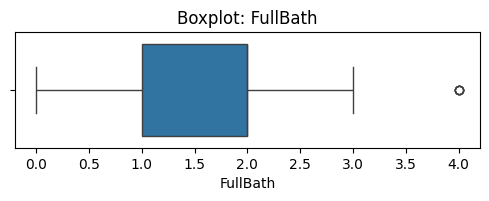

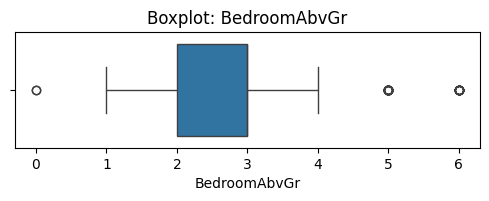

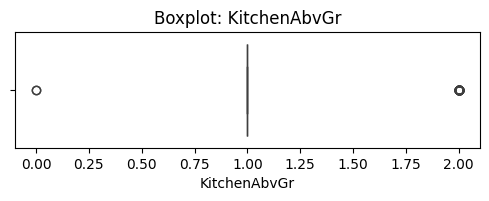

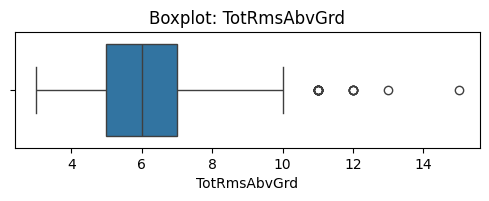

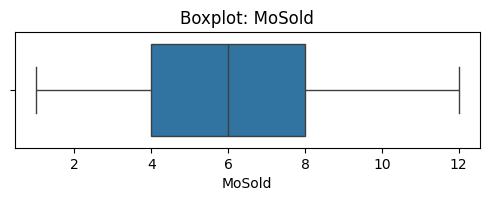

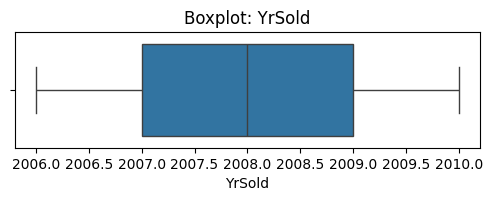

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

test_numeric_cols = dft.select_dtypes(include=['number']).columns.tolist()
for col in test_numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=dft[col])
    plt.title(f'Boxplot: {col}')
    plt.show()
#Các chấm xa hộp là outlier

In [34]:
test_remove_cols = ["YearRemodAdd", "MoSold", "YrSold"]
test_cols_list = [col for col in test_numeric_cols if col not in test_remove_cols]

In [35]:
#clipping of threshold values
for col in test_cols_list:
    #Tính ngưỡng dưới và ngưỡng trên
    lw, uw = whisker(dft[col])

    #Nếu giá trị nhỏ hơn lw, thay bằng lw
    dft[col] = np.where(dft[col] < lw, lw, dft[col])

    #Nếu giá trị lớn hơn uw, thay bằng uw
    dft[col] = np.where(dft[col] > uw, uw, dft[col])

In [36]:
print(len(dft.columns))

42


In [37]:
print(dfn.isna().sum())

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
PavedDrive       0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64


#Mã hóa dữ liệu cho các giá trị kiểu đối tượng, chuỗi,... (dữ liệu phân loại)
Chuyển sang dạng số (numeric)

In [38]:
train_object_cols = dfn.select_dtypes(include=['object', 'string']).columns.tolist()

In [39]:
test_object_cols = dft.select_dtypes(include=['object', 'string']).columns.tolist()

In [40]:
print(train_object_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [41]:
print(test_object_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [42]:
import pandas as pd

# Giả sử df là DataFrame ban đầu, đã có cột 'SalePrice'
# Danh sách tất cả các cột categorical
categorical_cols = train_object_cols

# Các cột có giá trị theo thức bậc → dùng Ordinal Encoding
ordinal_mappings = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'PavedDrive': ['N', 'P', 'Y'],
    'CentralAir': ['N', 'Y']
}

# Encode các cột có thứ tự
for col, order in ordinal_mappings.items():
  #Tạo kiểu dữ liệu thứ tự, mã hóa theo chỉ số
    dfn[col] = dfn[col].astype(pd.CategoricalDtype(categories=order, ordered=True)).cat.codes
    dft[col] = dft[col].astype(pd.CategoricalDtype(categories=order, ordered=True)).cat.codes

# Các cột còn lại sẽ dùng target encoding (các cột không có thứ tự rõ ràng)
target = 'SalePrice'
ordinal_cols = list(ordinal_mappings.keys())
target_encoding_cols = [col for col in categorical_cols if col not in ordinal_cols]

for col in target_encoding_cols:
    mapping = dfn.groupby(col)[target].mean()# Tính trung bình SalePrice cho mỗi giá trị duy nhất
    dfn[col] = dfn[col].map(mapping)# Ánh xạ từng giá trị sang giá trị trung bình
    dft[col] = dft[col].map(mapping)

    # Xử lý nếu có giá trị NaN (do map không thành công)
    dfn[col] = dfn[col].fillna(dfn[target].mean())  # dùng mean toàn bộ nếu không khớp
    dft[col] = dft[col].fillna(dfn[target].mean())


In [43]:
display(dfn)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,186641.265856,8450.0,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,197107.340000,...,1.0,3,8.0,7,2,2,2008,171367.354775,173311.087646,208500.0
1,20.0,186641.265856,9600.0,177526.056052,162895.428649,176679.914569,177358.826936,176773.308511,2,234685.227273,...,1.0,2,6.0,7,2,5,2007,171367.354775,173311.087646,181500.0
2,60.0,186641.265856,11250.0,177526.056052,200291.106405,176679.914569,177358.826936,174008.317490,2,197107.340000,...,1.0,3,6.0,7,2,9,2008,171367.354775,173311.087646,223500.0
3,70.0,186641.265856,9550.0,177526.056052,200291.106405,176679.914569,177358.826936,177408.806084,2,208419.088235,...,1.0,3,7.0,7,2,2,2006,171367.354775,142517.094059,140000.0
4,60.0,186641.265856,14260.0,177526.056052,200291.106405,176679.914569,177358.826936,176773.308511,2,297854.158537,...,1.0,3,9.0,7,2,12,2008,171367.354775,173311.087646,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,186641.265856,7917.0,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,192380.297468,...,1.0,2,7.0,7,2,8,2007,171367.354775,173311.087646,175000.0
1456,20.0,186641.265856,13175.0,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,189050.068493,...,1.0,2,7.0,6,2,2,2010,171367.354775,173311.087646,210000.0
1457,70.0,186641.265856,9042.0,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,208419.088235,...,1.0,3,9.0,7,2,5,2010,171367.354775,173311.087646,266500.0
1458,20.0,186641.265856,9717.0,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,145825.024444,...,1.0,3,5.0,7,2,4,2010,171367.354775,173311.087646,142125.0


In [44]:
display(dft)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,20.0,131558.375000,11622.00,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,145825.024444,...,2.0,1.0,2,5.0,7,2,6,2010,171367.354775,173311.087646
1,20.0,186641.265856,14267.00,177526.056052,200291.106405,176679.914569,177358.826936,177408.806084,2,145825.024444,...,3.0,1.0,3,6.0,7,2,6,2010,171367.354775,173311.087646
2,60.0,186641.265856,13830.00,177526.056052,200291.106405,176679.914569,177358.826936,174008.317490,2,192380.297468,...,3.0,1.0,2,6.0,7,2,3,2010,171367.354775,173311.087646
3,60.0,186641.265856,9978.00,177526.056052,200291.106405,176679.914569,177358.826936,174008.317490,2,192380.297468,...,3.0,1.0,3,7.0,7,2,6,2010,171367.354775,173311.087646
4,120.0,186641.265856,5005.00,177526.056052,200291.106405,220184.570000,177358.826936,174008.317490,2,275573.500000,...,2.0,1.0,3,5.0,7,2,1,2010,171367.354775,173311.087646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,145.0,125457.082569,1936.00,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,98576.470588,...,3.0,1.0,2,5.0,7,2,6,2006,171367.354775,173311.087646
1455,145.0,125457.082569,1894.00,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,98576.470588,...,3.0,1.0,2,6.0,7,2,4,2006,171367.354775,142517.094059
1456,20.0,186641.265856,17707.25,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,156270.122449,...,4.0,1.0,2,7.0,7,2,9,2006,171367.354775,142517.094059
1457,85.0,186641.265856,10441.00,177526.056052,162895.428649,176679.914569,177358.826936,174008.317490,2,156270.122449,...,3.0,1.0,2,6.0,7,2,7,2006,171367.354775,173311.087646


In [45]:
duplicate_count = dfn.duplicated().sum()
print("Số hàng trùng lặp:", duplicate_count)

Số hàng trùng lặp: 0


In [46]:
duplicate_count = dft.duplicated().sum()
print("Số hàng trùng lặp:", duplicate_count)

Số hàng trùng lặp: 0


In [47]:
dfn.to_csv('/content/sample_data/processed_train.csv', index=True, encoding='utf-8')

In [48]:
dft.to_csv('/content/sample_data/processed_test.csv', index=False, encoding='utf-8')